In [3]:
#!pip install opencv-python if opencv not installed

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image Imported Successfully


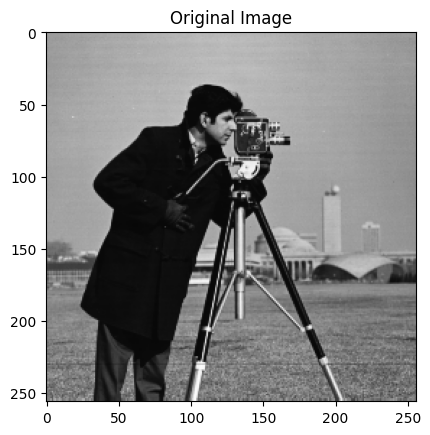

In [5]:
# Reading the Image
img = cv2.imread('cameraman_grayscale.png')
if img is None:
    print("Invalid Path")
else:
    print("Image Imported Successfully")
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.title("Original Image")

Text(0.5, 1.0, 'Gray Scale Image')

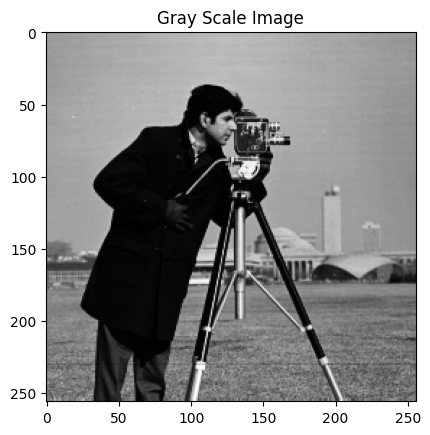

In [6]:
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap = 'gray')
plt.title("Gray Scale Image")

Exported Succesfully


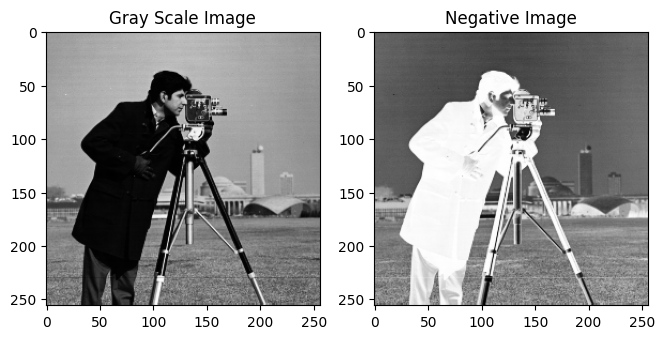

In [7]:
# Finding the Image Neagative
L = img.max() # Finfing the Brightest Pixel 
neg_img = L - gray_img # In digital negative we subtract from the brightest cell
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(gray_img,cmap='gray')
plt.title("Gray Scale Image")
plt.subplot(1,3,2)
plt.imshow(neg_img,cmap='gray')
plt.title("Negative Image")
#Doing this to export the image
if neg_img is not None:
    cv2.imwrite("Girl_negative.png",neg_img)
    print("Exported Succesfully")
else:
    print("Not Exported")

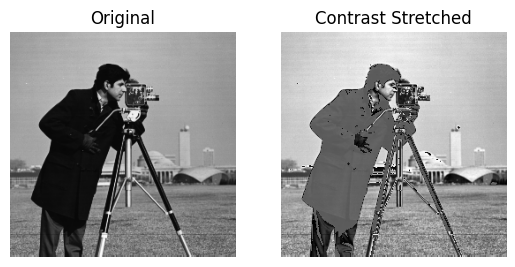

In [8]:
#Contrast Stretching
#r_min, r_max=np.min(img), np.max(img)
r_min, r_max=20,200
contrast_stretch=((img-r_min)/(r_max-r_min)*255).astype(np.uint8)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(contrast_stretch, cmap='gray'); plt.title('Contrast Stretched'); plt.axis('off')
plt.show()

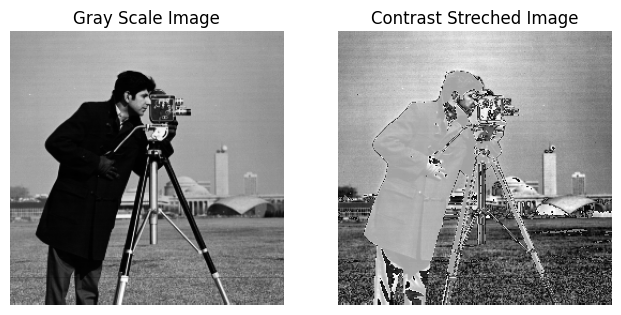

In [9]:
# Enhancing Image Through Contrast Streching
r_min,r_max = 100 , 200
contrast_img = ((gray_img - r_min) / (r_max - r_min) * 255).astype(np.uint8)#Doing to to convert into unsigned integer 

#This occured because the values of brightest pixel is going beyond 255 and the value is round off to 0 that why there are some black patches on the face
plt.figure(figsize=(12,5))
plt.subplot(1,3,1); plt.imshow(gray_img,cmap='gray'); plt.title("Gray Scale Image"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(contrast_img,cmap='gray'); plt.title("Contrast Streched Image"); plt.axis('off')
plt.show()

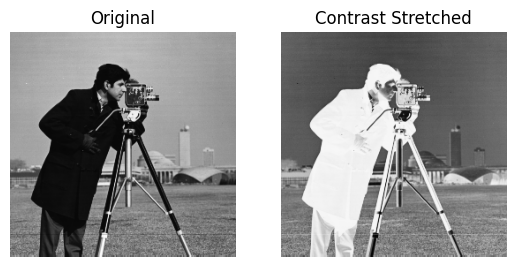

In [10]:
#Contrast Stretching
#r_min, r_max=np.min(img), np.max(img)
r_min, r_max=255,0
contrast_stretch=((img-r_min)/(r_max-r_min)*255).astype(np.uint8)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(contrast_stretch, cmap='gray'); plt.title('Contrast Stretched'); plt.axis('off')
plt.show()

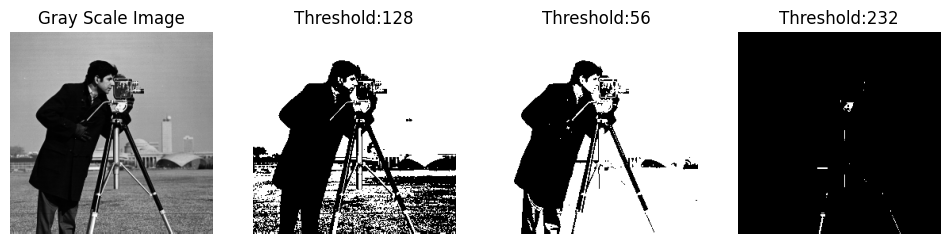

In [11]:
#Enhancement through Thresholding
threshold_value1 = 128
threshold_value2 = 56
threshold_value3 = 232
_,binary_img1 = cv2.threshold(gray_img,threshold_value1 , 255,cv2.THRESH_BINARY)
_,binary_img2 = cv2.threshold(gray_img,threshold_value2 , 255,cv2.THRESH_BINARY)
_,binary_img3 = cv2.threshold(gray_img,threshold_value3 , 255,cv2.THRESH_BINARY)

plt.figure(figsize=(12,5))
plt.subplot(1,4,1); plt.imshow(gray_img,cmap='gray'); plt.title("Gray Scale Image"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(binary_img1,cmap='gray'); plt.title(f"Threshold:{threshold_value1}"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(binary_img2,cmap='gray'); plt.title(f"Threshold:{threshold_value2}"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(binary_img3,cmap='gray'); plt.title(f"Threshold:{threshold_value3}"); plt.axis('off')
plt.show()

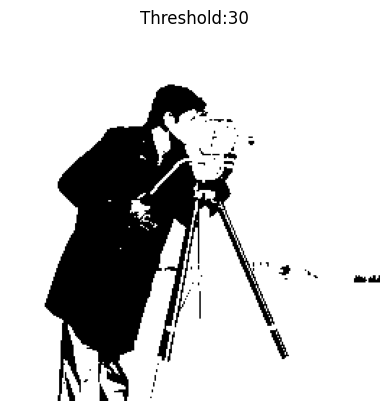

In [12]:
threshold_value4 = 30
_,binary_img4 = cv2.threshold(gray_img,threshold_value4 , 255,cv2.THRESH_BINARY)
plt.imshow(binary_img4,cmap='gray'); plt.title(f"Threshold:{threshold_value4}"); plt.axis('off')
plt.show()

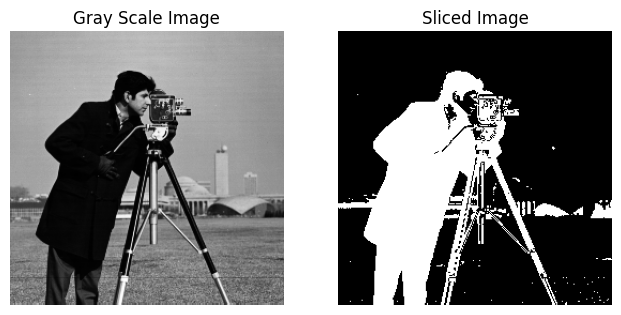

In [13]:
lower,upper = 80 , 200 #Converting this range to black above this will remain unchanged or to white values
#Converting the image in range from lower to upper into black and rest all white
sliced_image = np.where((gray_img >= lower) & (gray_img <= upper), 0,255).astype(np.uint8)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(gray_img,cmap='gray')
plt.title("Gray Scale Image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sliced_image,cmap='gray')
plt.title("Sliced Image")
plt.axis('off')
plt.show()

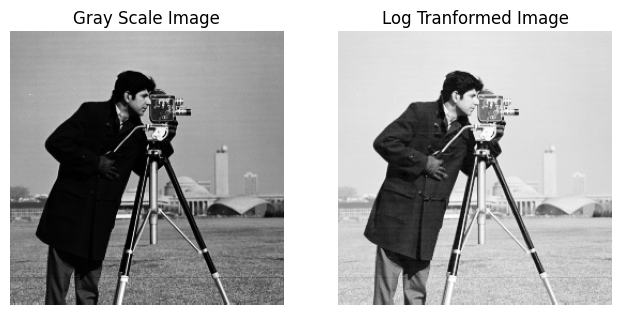

In [14]:
    #Enhancing the Image Through Log Transformation
#Expands the dark region and compresses the bright values

c = 255 / np.log(1 + np.max(gray_img))#Equation
log_transformed = c * (np.log(gray_img + 1))
log_transformed_img = np.array(log_transformed, dtype=np.uint8)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(gray_img,cmap='gray')
plt.title("Gray Scale Image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(log_transformed_img,cmap='gray')
plt.title("Log Tranformed Image")
plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

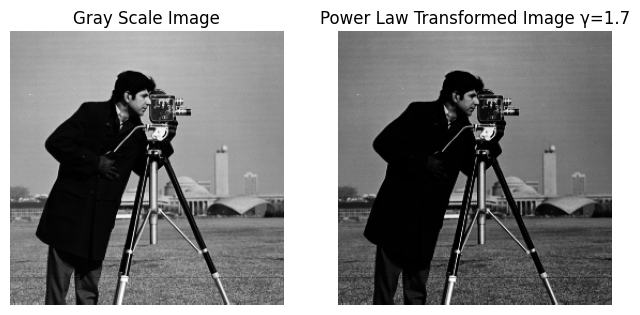

In [15]:
#Power Law Transformation
gamma = 1.7  # Choose between 0.1 (brighten), 1.0, 2.0 (darken), etc.
c = 255 / np.max(gray_img)**gamma
powerlaw_img = c * (gray_img ** gamma)
powerlaw_img = np.array(powerlaw_img, dtype=np.uint8)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(gray_img,cmap='gray')
plt.title("Gray Scale Image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(powerlaw_img,cmap='gray')
plt.title(f"Power Law Transformed Image γ={gamma}")
plt.axis('off')